In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
from numpy import cos
from numpy import sin
import scipy.integrate as integrate
import time
from skopt import gp_minimize
import pandas as pd

/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
## whole field
def B(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*cos(w*t) +np.array([0,1,0])*sin(w*t) )+\
    v2*(np.array([1,0,0])*cos((n-1)*w*t) +np.array([0,1,0])*sin((n-1)*w*t))+\
    v3*(np.array([0,-1,0])*cos((n-1)*w*t) +np.array([1,0,0])*sin((n-1)*w*t))+\
    v4*(np.array([0,0,1])*sin(n*w*t))+\
    v5*(np.array([0,0,1])*cos(n*w*t))+\
    v6*(np.array([-1,0,0])*cos((n+1)*w*t) +np.array([0,1,0])*sin((n+1)*w*t))+\
    v7*(np.array([0,1,0])*cos((n+1)*w*t) +np.array([1,0,0])*sin((n+1)*w*t)))
    
def B_prime(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*sin(w*t) +np.array([0,1,0])*cos(w*t) )*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([0,1,0])*(n-1)*cos((n-1)*w*t))*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([1,0,0])*(n-1)*cos((n-1)*w*t))*w+\
    v4*(np.array([0,0,1])*n*cos(n*w*t))*w+\
    v5*(np.array([0,0,1])*(-1)*n*sin(n*w*t))*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([0,1,0])*(n+1)*cos((n+1)*w*t))*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([1,0,0])*(n+1)*cos((n+1)*w*t))*w)

def B_prime2(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*cos(w*t) +np.array([0,1,0])*(-1)*sin(w*t) )*w*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([0,1,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([1,0,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v4*(np.array([0,0,1])*(-1)*n*n*sin(n*w*t))*w*w+\
    v5*(np.array([0,0,1])*(-1)*n*n*cos(n*w*t))*w*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([0,1,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([1,0,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w)







    

In [7]:
lam=1.8686003910229945
v=np.random.uniform(low=-1, high=1, size=(7,))
v=[1,-1,0,0.5,1,-0.5,-1]
n=10
w=1
Y=0.10772427142152266
a=-5/180*np.pi


In [8]:
v=[1,-1,0,0.5,1,-0.5,-1]


## each direction 
def Bx(t):
    return  B(t)[0]
def By(t):
    return  B(t)[1]
def Bz(t):
    return  B(t)[2]


def Bx_p(t):
    return  B_prime(t)[0]
def By_p(t):
    return   B_prime(t)[1]
def Bz_p(t):
    return   B_prime(t)[2]


def Bx_p2(t):
    return  B_prime2(t)[0]
def By_p2(t):
    return   B_prime2(t)[1]
def Bz_p2(t):
    return   B_prime2(t)[2]




In [9]:
## ux1,uy1,
def ux1(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((lam*Bx**2+By**2+Bz**2)*Bx_p+(-1+lam)*Bx*By*By_p)- Bx*Bz_p  )\
    /(Bx**2+By**2+Bz**2)
def uy1(T):
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((Bx**2+lam*By**2+Bz**2)*By_p+(-1+lam)*Bx*By*Bx_p)-By*Bz_p )\
    /(Bx**2+By**2+Bz**2)

## ux2
def ux2(T):
    global lam
    
    
    a1=Bx(T)*Bz(T)*(Bx(T)**2+By(T)**2+Bz(T)**2)**2*(By(T)*Bx_p(T)-Bx(T)*By_p(T))**2/(lam*Bx(T)**2+lam*By(T)**2+Bz(T)**2)**2
    #############
    a2=(2*By(T)*Bz(T)**2*(By(T)*Bx_p(T)-Bx(T)*By_p(T)) *(-Bx(T)*Bz(T)*Bx_p(T)+Bx(T)**2*Bz_p(T)+By(T) *(-Bz(T)*By_p(T) +By(T)*Bz_p(T))))\
    /(lam*Bx(T)**2+lam*By(T)**2+Bz(T)**2)
    
    ##########
    a3= (2*By(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
    (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T)+ 
    By(T)*By_p(T)) + (Bx(T)**2 + By(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*
    (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
    By(T)*By_p(T) + Bz(T)*Bz_p(T)) - 
    2*(Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) +
    Bx(T)*By_p(T))*(lam*Bx(T)*Bx_p(T) + lam*By(T)*By_p(T) + 
    Bz(T)*Bz_p(T)) + (Bz(T)*((2 - lam)*Bx(T)**2 - (-2 + lam)*By(T)**2 + Bz(T)**2)*
    (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*
    (-(Bx(T)**2*Bz_p(T)) + Bx(T)*Bz(T)*Bx_p(T) + 
    By(T)*(Bz(T)*By_p(T) - By(T)*Bz_p(T))))/(Bx(T)**2 + By(T)**2 + Bz(T)**2) + 
    (Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*
    (-(By(T)*Bx_p2(T)) + Bx(T)*By_p2(T))))/\
    ((lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2*(lam*(Bx(T)**2 + By(T)**2) + Bz(T)**2))
    a4=Bx(T)*((Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - Bx(T)*By_p(T))**2)\
    /(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 - 
    2*(Bx(T)*Bx_p(T) + By(T)*By_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
    Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))) - 
    (6*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T) + By(T)*By_p(T) + 
    Bz(T)*Bz_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + Bx(T)**2*Bz_p(T) + 
    By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))))/
    (Bx(T)**2 + By(T)**2 + Bz(T)**2) + 2*(Bx(T)**2 + By(T)**2)*
    (Bx(T)*Bx_p(T)*Bz_p(T) - 
    Bz(T)*(Bx_p(T)**2 + By_p(T)**2 + Bx(T)*Bx_p2(T) + 
    By(T)*By_p2(T)) + Bx(T)**2*Bz_p2(T) + 
    By(T)*(By_p(T)*Bz_p(T) + By(T)*Bz_p2(T))))
    
    
    return (a1+a2+a3+a4)/(2*(Bx(T)**2+By(T)**2 )**2*(Bx(T)**2+By(T)**2+Bz(T)**2)**1.5)


## uy2
def uy2(T):
    global lam
    return ((By(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - Bx(T)*By_p(T))**2)\
             /(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 + 
            (2*Bx(T)*Bz(T)**2*(-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*\
            (-(Bx(T)*Bz(T)*Bx_p(T)) + Bx(T)**2*Bz_p(T) + 
            By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))))/
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2) - (2*Bx(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*\
            (-2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
            (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T)) + (Bx(T)**2 + By(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
            (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T) + Bz(T)*Bz_p(T)) - 
            2*(Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + 
            Bx(T)*By_p(T))*(lam*Bx(T)*Bx_p(T) + lam*By(T)*By_p(T) + 
            Bz(T)*Bz_p(T)) + (Bz(T)*((2 - lam)*Bx(T)**2 - (-2 + lam)*By(T)**2 + Bz(T)**2)*\
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + 
            Bx(T)*By_p(T))*(Bx(T)*Bz(T)*Bx_p(T) - Bx(T)**2*Bz_p(T) + 
            By(T)*(Bz(T)*By_p(T) - By(T)*Bz_p(T))))/ \
            (Bx(T)**2 + By(T)**2 + Bz(T)**2) + (Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*\
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p2(T)) + 
            Bx(T)*By_p2(T))))/((lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2*\
            (lam*(Bx(T)**2 + By(T)**2) + Bz(T)**2)) + 
            By(T)*((Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - 
            Bx(T)*By_p(T))**2)/(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 - 
            2*(Bx(T)*Bx_p(T) + By(T)*By_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
            Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + 
            By(T)*Bz_p(T))) - (6*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T) + Bz(T)*Bz_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
            Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + 
            By(T)*Bz_p(T))))/(Bx(T)**2 + By(T)**2 + Bz(T)**2) + 
            2*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T)*Bz_p(T) - 
            Bz(T)*(Bx_p(T)**2 + By_p(T)**2 + Bx(T)*Bx_p2(T) + 
            By(T)*By_p2(T)) + Bx(T)**2*Bz_p2(T) + 
            By(T)*(By_p(T)*Bz_p(T) + By(T)*Bz_p2(T)))))/\
            (2*(Bx(T)**2 + By(T)**2)**2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**(3/2))


In [10]:
## ux1,uy1,
def ux1(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((lam*Bx**2+By**2+Bz**2)*Bx_p+(-1+lam)*Bx*By*By_p)- Bx*Bz_p  )\
    /(Bx**2+By**2+Bz**2)
def uy1(T):
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((Bx**2+lam*By**2+Bz**2)*By_p+(-1+lam)*Bx*By*Bx_p)-By*Bz_p )\
    /(Bx**2+By**2+Bz**2)

In [11]:
## ux2
def ux2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    
    
    a1=Bx*Bz*(Bx**2+By**2+Bz**2)**2*(By*Bx_p-Bx*By_p)**2/(lam*Bx**2+lam*By**2+Bz**2)**2
    #############
    a2=(2*By*Bz**2*(By*Bx_p-Bx*By_p) *(-Bx*Bz*Bx_p+Bx**2*Bz_p+By *(-Bz*By_p +By*Bz_p)))\
    /(lam*Bx**2+lam*By**2+Bz**2)
    
    ##########
    a3= (2*By*Bz*(Bx**2 + By**2 + Bz**2)*(-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p+ 
    By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
    By*By_p + Bz*Bz_p) - 
    2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) +
    Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
    Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*
    (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + Bx*By_p)*
    (-(Bx**2*Bz_p) + Bx*Bz*Bx_p + 
    By*(Bz*By_p - By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
    (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p2) + Bx*By_p2)))/\
    ((lam*Bx**2 + lam*By**2 + Bz**2)**2*(lam*(Bx**2 + By**2) + Bz**2))
    a4=Bx*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
    /(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
    2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
    Bx**2*Bz_p + By*(-(Bz*By_p) + By*Bz_p)) - 
    (6*(Bx**2 + By**2)*(Bx*Bx_p + By*By_p + 
    Bz*Bz_p)*(-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
    By*(-(Bz*By_p) + By*Bz_p)))/
    (Bx**2 + By**2 + Bz**2) + 2*(Bx**2 + By**2)*
    (Bx*Bx_p*Bz_p - 
    Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
    By*By_p2) + Bx**2*Bz_p2 + 
    By*(By_p*Bz_p + By*Bz_p2)))
    
    
    return (a1+a2+a3+a4)/(2*(Bx**2+By**2 )**2*(Bx**2+By**2+Bz**2)**1.5)



In [12]:
## uy2
def uy2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    return ((By*Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
             /(lam*Bx**2 + lam*By**2 + Bz**2)**2 + 
            (2*Bx*Bz**2*(-(By*Bx_p) + Bx*By_p)*\
            (-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
            By*(-(Bz*By_p) + By*Bz_p)))/
            (lam*Bx**2 + lam*By**2 + Bz**2) - (2*Bx*Bz*(Bx**2 + By**2 + Bz**2)*\
            (-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p) - 
            2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
            Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(Bx*Bz*Bx_p - Bx**2*Bz_p + 
            By*(Bz*By_p - By*Bz_p)))/ \
            (Bx**2 + By**2 + Bz**2) + (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p2) + 
            Bx*By_p2)))/((lam*Bx**2 + lam*By**2 + Bz**2)**2*\
            (lam*(Bx**2 + By**2) + Bz**2)) + 
            By*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - 
            Bx*By_p)**2)/(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
            2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)) - (6*(Bx**2 + By**2)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
            2*(Bx**2 + By**2)*(Bx*Bx_p*Bz_p - 
            Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
            By*By_p2) + Bx**2*Bz_p2 + 
            By*(By_p*Bz_p + By*Bz_p2))))/\
            (2*(Bx**2 + By**2)**2*(Bx**2 + By**2 + Bz**2)**(3/2))



In [13]:
import scipy.integrate as integrate
def target(vv):
    global v
    v=vv
    dx1=np.mean([ux1(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dx2=np.mean([ux2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dy1=np.mean([uy1(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    return -np.absolute(dy1/(dx1+dx2))*dy1

In [14]:
import time

start = time.time()

test=np.mean([uy2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
end = time.time()
print(end - start)

0.39759397506713867


In [15]:
integrate.quad(uy2, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(10.82683996357988, 1.005332422477057)

In [16]:
start = time.time()
integrate.romberg(uy2, 0, 2*np.pi)
end = time.time()
print(end - start)

0.44419264793395996


/anaconda/lib/python3.6/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.497745e-01
  AccuracyWarning)


In [17]:
integrate.quad(ux2, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(0.6330924660495176, 1.8594621413421462)

In [18]:
integrate.romberg(ux1, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.399447e-03
  AccuracyWarning)


-0.31546371450513955

In [19]:
sam= np.random.uniform(low=-1, high=1, size=(7,))

In [20]:
start = time.time()
Target=target(sam)
end = time.time()
print(end - start)
print(Target)

0.8616509437561035
-0.0002516108041048897


In [21]:
import cma

In [22]:
import time
from neat.parallel import ParallelEvaluator

# parrellel computing

In [ ]:
for i in range(40):

    with cma.fitness_transformations.EvalParallel(6) as eval_all:
        es = cma.CMAEvolutionStrategy(np.random.uniform(low=-1, high=1, size=(7,)), 0.5,{'maxfevals':500,'bounds': [[-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,1]],\
                                                                                      'verb_disp': 200  ,'verb_log': 200  } )
        while not es.stop():
            X = es.ask()
            es.tell(X, eval_all(target, X))  
            # was: es.tell(X, [fitness(x) for x in X])
            es.disp()
    np.savetxt("cma_es_parrelel_"+str(40+i)+".csv", es.result.xbest, delimiter=",")


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=391974, Tue Jan 28 19:53:01 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.348096157752628e-04 1.0e+00 4.94e-01  5e-01  5e-01 0:02.4
    2     18 -2.502746925718562e-03 1.3e+00 4.96e-01  5e-01  5e-01 0:04.7
    3     27 -4.409275288235824e-03 1.3e+00 5.42e-01  5e-01  6e-01 0:06.9
    5     45 -3.861324743611634e-03 1.6e+00 5.65e-01  5e-01  6e-01 0:11.3
    7     63 -2.419695990210250e-01 1.6e+00 4.78e-01  4e-01  5e-01 0:15.6
   10     90 -8.246103963391045e-03 1.7e+00 4.02e-01  3e-01  4e-01 0:22.4
   13    117 -1.837186307914811e-02 1.7e+00 3.27e-01  3e-01  3e-01 0:29.3
   17    153 -1.948697978618620e-02 2.0e+00 2.74e-01  2e-01  3e-01 0:38.5
   21    189 -3.417736365329809e-02 2.1e+00 2.36e-01  2e-01  2e-01 0:47.9
   25    225 -5.897115260554724e-01 2.1e+00 2.16e-01  1e-01  2e-01 0:57.2
   30    270 -4.376803241352477e-01 2.4e+00 1.74e-01  9e-02  1e-01 1:08.7
   35    315 -4.29801529

    1      9 -6.166948878175137e-05 1.0e+00 4.86e-01  5e-01  5e-01 0:02.8
    2     18 -1.776699265157816e-03 1.2e+00 4.80e-01  5e-01  5e-01 0:05.3
    3     27 -4.801374698035748e-04 1.4e+00 4.88e-01  5e-01  5e-01 0:07.6
    5     45 -6.626618959506420e-04 1.7e+00 4.70e-01  4e-01  5e-01 0:12.5
    7     63 -8.032656375757063e-03 1.9e+00 4.67e-01  4e-01  5e-01 0:17.0
   10     90 -3.968871293526832e-03 2.2e+00 4.68e-01  4e-01  5e-01 0:23.8
   13    117 -9.964738968114117e-03 2.8e+00 3.77e-01  3e-01  5e-01 0:30.7
   17    153 -6.034708700562526e-02 2.9e+00 3.15e-01  2e-01  4e-01 0:39.9
   21    189 -9.921018046714322e-03 3.1e+00 2.89e-01  2e-01  3e-01 0:49.1
   25    225 -1.536193220097660e-02 3.4e+00 2.92e-01  2e-01  4e-01 0:58.3
   30    270 -6.039401369738495e-02 3.8e+00 2.08e-01  1e-01  2e-01 1:09.8
   35    315 -6.258732905068441e-02 3.6e+00 1.74e-01  1e-01  2e-01 1:21.3
   41    369 -6.739793552216453e-01 3.6e+00 1.15e-01  7e-02  1e-01 1:35.3
   47    423 -5.110240991181027e+00 4.

    3     27 -5.592525267817551e-03 1.3e+00 4.73e-01  4e-01  5e-01 0:07.6
    5     45 -5.020333366738120e-03 1.4e+00 4.86e-01  4e-01  5e-01 0:12.4
    7     63 -1.264097638164925e-02 1.5e+00 4.83e-01  4e-01  5e-01 0:17.6
    9     81 -9.492391474376041e-02 1.6e+00 5.25e-01  4e-01  6e-01 0:22.6
   12    108 -4.690473533524791e-02 1.9e+00 4.38e-01  3e-01  5e-01 0:30.1
   15    135 -2.876124036393349e-02 1.9e+00 3.16e-01  2e-01  3e-01 0:37.6
   19    171 -3.412262452744042e-02 1.8e+00 2.79e-01  2e-01  3e-01 0:47.7
   23    207 -2.160301789007597e-01 2.2e+00 1.91e-01  1e-01  2e-01 0:57.7
   27    243 -2.724933733605003e+00 2.2e+00 1.62e-01  9e-02  2e-01 1:08.9
   31    279 -3.472198375500212e-02 2.6e+00 1.32e-01  7e-02  1e-01 1:20.9
   36    324 -6.991614268243246e-02 3.5e+00 1.03e-01  6e-02  1e-01 1:33.5
   42    378 -3.143357488455408e-01 4.6e+00 7.05e-02  4e-02  7e-02 1:48.4
   48    432 -1.213052774365090e+00 5.7e+00 6.36e-02  3e-02  6e-02 2:03.2
   54    486 -3.372646057405070e-01 8.

    5     45 -1.930120817567385e-03 1.8e+00 5.74e-01  5e-01  7e-01 0:12.6
    7     63 -1.353049960353024e-02 2.2e+00 5.53e-01  5e-01  7e-01 0:17.5
   10     90 -8.016589812093655e-04 2.8e+00 7.23e-01  6e-01  1e+00 0:24.9
   13    117 -1.553269319138693e-02 3.1e+00 5.44e-01  4e-01  7e-01 0:32.3
   16    144 -1.494770923561668e-01 3.3e+00 5.43e-01  4e-01  7e-01 0:40.0
   20    180 -3.944755151447500e-03 3.0e+00 6.16e-01  4e-01  8e-01 0:50.0
   24    216 -9.133228081157307e-02 3.2e+00 3.91e-01  3e-01  5e-01 1:00.0
   28    252 -2.992775648663228e-02 3.6e+00 4.25e-01  3e-01  6e-01 1:10.1
   33    297 -3.423384209922382e-02 3.4e+00 4.81e-01  3e-01  6e-01 1:22.5
   38    342 -1.009504835625301e-01 3.5e+00 4.25e-01  2e-01  5e-01 1:35.2
   44    396 -2.612385846786134e-02 2.8e+00 3.75e-01  2e-01  4e-01 1:50.3
   50    450 -2.580033235954264e-01 2.6e+00 4.02e-01  2e-01  4e-01 2:05.3
   56    504 -6.856176248346327e-02 2.9e+00 3.33e-01  2e-01  3e-01 2:20.3
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in 

    9     81 -1.794673228038015e-02 2.7e+00 6.44e-01  5e-01  1e+00 0:27.3
   11     99 -1.706568191459846e-02 3.0e+00 5.74e-01  4e-01  1e+00 0:34.4
   14    126 -2.292052273730633e-01 3.5e+00 6.12e-01  4e-01  1e+00 0:43.9
   17    153 -2.162299199845863e-02 3.7e+00 5.19e-01  3e-01  1e+00 0:53.7
   21    189 -4.368817368134603e-02 3.3e+00 4.05e-01  2e-01  7e-01 1:05.5
   25    225 -3.625067153465195e-01 3.6e+00 2.90e-01  2e-01  5e-01 1:16.3
   29    261 -2.514010653527654e-02 3.6e+00 2.37e-01  1e-01  4e-01 1:27.4
   34    306 -1.003110438014332e-01 4.1e+00 1.89e-01  9e-02  3e-01 1:40.0
   40    360 -1.053093783926584e-01 4.4e+00 1.52e-01  7e-02  2e-01 1:55.5
   46    414 -1.738927900822707e-01 4.3e+00 1.16e-01  5e-02  1e-01 2:11.5
   52    468 -1.790197196299787e-01 4.9e+00 9.20e-02  3e-02  1e-01 2:26.9
   56    504 -3.924714849850764e-01 5.0e+00 6.93e-02  2e-02  8e-02 2:37.6
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=378360, Tue Jan 28 20:50:07 2020)
Iterat #Fevals   funct

    7     63 -2.473061418702662e-03 1.6e+00 4.28e-01  4e-01  4e-01 0:17.5
    9     81 -6.204859400684986e-02 1.6e+00 3.90e-01  3e-01  4e-01 0:23.0
   12    108 -2.771310933460647e-02 1.8e+00 4.26e-01  3e-01  5e-01 0:31.4
   15    135 -1.911631552650816e-02 2.1e+00 4.32e-01  3e-01  5e-01 0:39.4
   19    171 -1.711566895352940e-01 2.1e+00 2.99e-01  2e-01  3e-01 0:49.6
   23    207 -1.080158418466014e-02 2.2e+00 3.31e-01  2e-01  4e-01 0:59.7
   27    243 -1.020426795226629e-02 2.9e+00 3.00e-01  2e-01  4e-01 1:09.9
   32    288 -2.565272683340371e-02 3.2e+00 2.83e-01  2e-01  4e-01 1:23.1
   37    333 -1.572803054814002e-01 2.9e+00 1.78e-01  1e-01  2e-01 1:35.4
   43    387 -3.534927770286115e-01 2.6e+00 1.06e-01  6e-02  1e-01 1:49.9
   49    441 -7.628642074736136e-01 3.0e+00 9.69e-02  5e-02  1e-01 2:04.7
   56    504 -1.552986096766673e-01 3.1e+00 8.91e-02  4e-02  8e-02 2:21.9
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=342567, Tue Jan 28 21:04:18 2020)
Iterat #Fevals   funct

In [145]:
start = time.time()
v=np.random.uniform(low=-1, high=1, size=(7,))
res_2 = cma.fmin(target,\
v,\
0.5, options = {'maxfevals':500,\
'bounds': [[-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,1]],'verb_disp': 100  ,'verb_log': 100  }  )  #doctest: +ELLIPSIS

end = time.time()
print(end - start)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=433444, Tue Jan 28 17:00:18 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -8.122451485466529e-04 1.0e+00 4.97e-01  5e-01  5e-01 0:06.8
    2     18 -2.042020257706484e-03 1.3e+00 5.57e-01  5e-01  7e-01 0:13.4
    3     27 -9.687796138269707e-03 1.6e+00 5.67e-01  5e-01  7e-01 0:20.0
    4     36 -3.691764464627389e-02 1.7e+00 5.85e-01  5e-01  7e-01 0:26.5
    5     45 -1.039384226903801e-02 1.7e+00 5.55e-01  5e-01  6e-01 0:33.2
    6     54 -2.047623335980596e-02 1.7e+00 5.32e-01  4e-01  6e-01 0:39.8
    7     63 -3.637862281075650e-02 1.8e+00 5.45e-01  4e-01  6e-01 0:46.5
    9     81 -2.371777874505723e-02 1.9e+00 5.66e-01  4e-01  7e-01 0:59.7
   11     99 -1.320196386847876e-02 2.1e+00 5.68e-01  4e-01  6e-01 1:12.9
   13    117 -3.136928526687792e-03 2.1e+00 5.67e-01  4e-01  6e-01 1:26.0
   15    135 -6.139557091752935e-02 2.1e+00 5.21e-01  4e-01  6e-01 1:39.2
   17    153 -1.10886775

In [34]:
np.savetxt("cma_es_0128_01.csv", v, delimiter=",")

In [35]:
start = time.time()
for i in range(1):
    res = gp_minimize(target,                  # the function to minimize
                      [(-1.0, 1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0)],      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=400,         # the number of evaluations of f 
                      n_random_starts=7,  # the number of random initialization points
                      random_state=)   # the random seed
    np.savetxt("gp_parrelel_"+str(40+i)+".csv",res.x, delimiter=",")


    

end = time.time()
print(end - start)

In [36]:
v=res.x

In [37]:
v

[0.6956382084746415,
 -0.8276888117168055,
 -0.914612769342148,
 -0.7605408929147628,
 -0.9285077677770677,
 -0.8358143690304691,
 0.7044314221214567]

In [39]:
integrate.romberg(ux1, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.794379e-04
  AccuracyWarning)


-0.06761093995511877

In [107]:
target(v1[69])

-1.5407144415628522

In [108]:
v1[69]

array([-0.0329524 , -0.98833797, -0.02524205,  0.39393939, -0.96940308,
       -0.94494608, -0.42238877])

In [119]:
res_2=np.array([-0.0329524 , -0.98833797, -0.02524205,  0.40073567, -0.96940308,
       -0.94494608, -0.42238877])

In [120]:
res_2[6]=0

In [121]:
v1=[res_2+np.array([0,0,0,0,0,i,0]) for i in np.linspace(-1,1,100)]

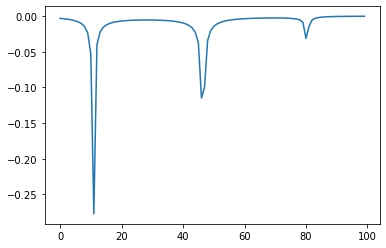

In [122]:
plt.plot([target(v1[i]) for i in range(100)] )

In [109]:
np.savetxt("gp_7.csv", v, delimiter=",")

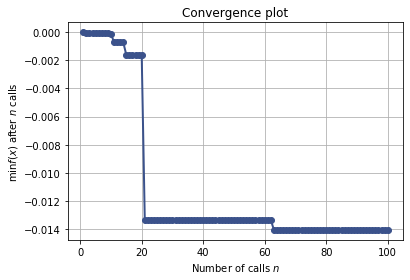

In [41]:
from skopt.plots import plot_convergence

plot_convergence(res)

In [39]:
data=pd.read_csv('fit.dat',header=None, sep=' ')

Text(0, 0.5, 'f(x)')

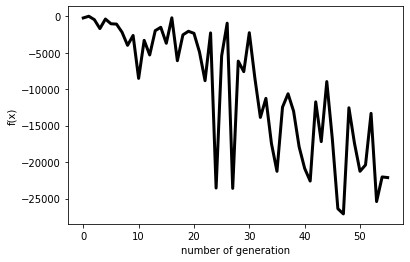

In [54]:
plt.plot(np.arange(56),data[data.columns[6]],c="k",linewidth=3)
plt.xlabel("number of generation")
plt.ylabel("f(x)")
